In [1]:
import random

random.seed(0)

import numpy as np 
np.random.seed(0)

import tensorflow as tf 
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 

In [3]:
#load data 

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [7]:
#len images 
print(len(train_images))
print(len(train_labels))
print(train_images[0].shape)




60000
60000
(28, 28)


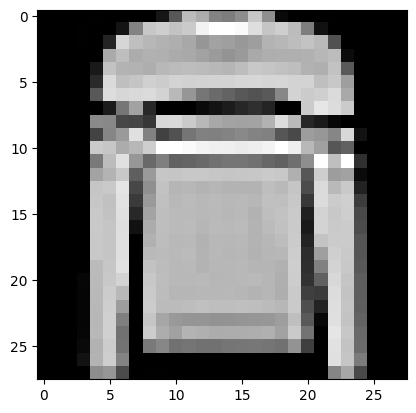

In [14]:
plt.imshow(train_images[5],cmap='gray')
plt.show()

In [15]:
print (train_labels[5])

2


class_names =['t-shirt/top','trousser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

data processing 

In [16]:
#normalize pixel values to be between 0 and 1
train_images, test_images= train_images/255.0,test_images/255.0


This 4D shape format, (num_samples, height, width, channels).
reshapes the train_images and test_images arrays to prepare them for a model that expects grayscale images with a specific shape

##
Grayscale (1 Channel),RGB (3 Channels),RGBA (4 Channels),...

In [17]:
#reshape images tp specify (grayscale)

train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

Convolutional Neural Network

1. models.Sequential(): Initializes a sequential model, meaning layers are added one after another.
2. Adds a 2D convolutional layer:
- 32 filters (kernels) are used, each producing a 2D feature map.
- (3, 3): Size of each filter, specifying a 3x3 region.
- activation='relu': Uses the ReLU activation function to introduce non-linearity.
- input_shape=(28, 28, 1): Defines the input shape as 28x28 pixels with 1 channel (grayscale).
3. MaxPooling2D((2, 2)): Adds a 2D max-pooling layer:
- Reduces the spatial dimensions by taking the maximum value within each 2x2 region, halving the size to reduce computation and help the model generalize.
4. Adding Dense Layers on Top (Fully Connected Layers)
- Flatten(): Flattens the 3D output of the convolutional layers into a 1D vector, preparing it for dense layers.
- Dense(64, activation='relu'): Adds a fully connected (dense) layer with 64 neurons and ReLU activation to introduce non-linearity and enable the model to learn complex patterns.

5. Compiling the Model


In [25]:
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout with 25% rate after the second pooling layer

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout with 25% rate after the second pooling layer

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout with 50% rate before the final dense layer

model.add(layers.Dense(10))
     

# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6369 - loss: 0.9878 - val_accuracy: 0.8296 - val_loss: 0.4488
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8176 - loss: 0.5118 - val_accuracy: 0.8545 - val_loss: 0.3854
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8448 - loss: 0.4383 - val_accuracy: 0.8754 - val_loss: 0.3422
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8594 - loss: 0.3985 - val_accuracy: 0.8856 - val_loss: 0.3138
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8707 - loss: 0.3716 - val_accuracy: 0.8875 - val_loss: 0.3039


Model Evaluation

- verbose parameter in Keras functions controls the level of detail in the output printed to the console during training or evaluation.

In [27]:

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8875 - loss: 0.3039

Test accuracy: 0.887499988079071


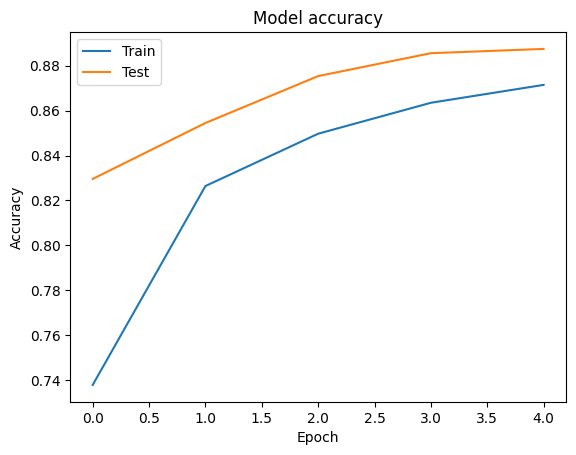

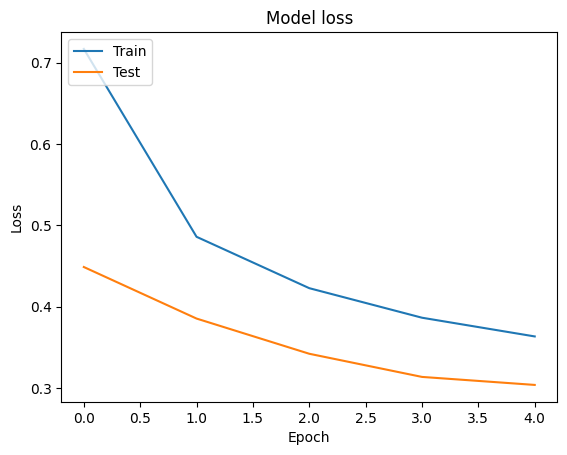

In [28]:


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

To add a confusion matrix to evaluate your model's performance on the test data, you can follow these steps:

1. Predict the labels for the test dataset.
2. Generate the confusion matrix using sklearn.metrics.confusion_matrix.
3. Visualize the matrix with a heatmap.

Using a Confusion Matrix with Normalization and Saving


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


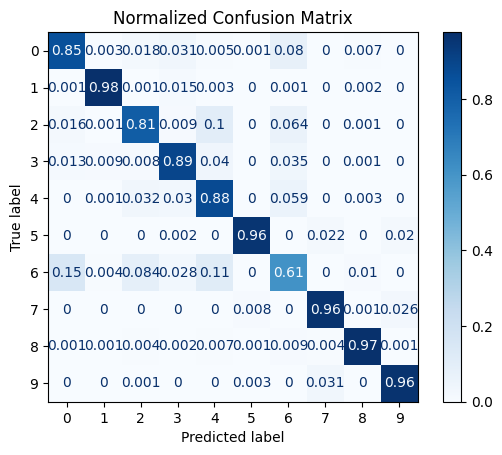

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict the classes for the test images
y_pred = np.argmax(model.predict(test_images), axis=1)

# Generate the confusion matrix with normalization
cm = confusion_matrix(test_labels, y_pred, normalize='true')  # Normalize to get percentages

# Plot and save the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.savefig('06-confusion-matrix.png')  # Save the plot as an image file
plt.show()
